<a href="https://colab.research.google.com/github/Jken09/ITBAN3/blob/main/LabActivity2_Sapid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1. Using the Colab notebook, import the following packages/ libraries/ modules:

#- OS

#- Numpy

#- Pandas

#- Matplotlib

#- Seaborn

#- Warnings (to suppress warnings)

import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#2. Import and load the dataset. Set the client_id as the index.

path="/content/drive/MyDrive/Colab Notebooks/loans.csv"
df=pd.read_csv(path)
df = df.set_index('client_id')

In [ ]:
#3. Display the contents of the dataset by showing its first 5 rows.

print(df.head(5))

          loan_type  loan_amount  repaid  loan_id  loan_start    loan_end  \
client_id                                                                   
46109          home        13672       0    10243  2002-04-16  2003-12-20   
46109        credit         9794       0    10984  2003-10-21  2005-07-17   
46109          home        12734       1    10990  2006-02-01  2007-07-05   
46109          cash        12518       1    10596  2010-12-08  2013-05-05   
46109        credit        14049       1    11415  2010-07-07  2012-05-21   

           rate  
client_id        
46109      2.15  
46109      1.25  
46109      0.68  
46109      1.24  
46109      3.13  


In [ ]:
#4. Check the info of the dataset and the datatypes for each columns.

print(df.info())
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB
None
loan_type       object
loan_amount      int64
repaid           int64
loan_id          int64
loan_start      object
loan_end        object
rate           float64
dtype: object


In [ ]:
#5. Determine whether the dataset has missing values.

missing_values = df.isnull().sum()
print(missing_values)
has_missing_values = any(missing_values > 0)
if has_missing_values:
  print("The dataset has missing values.")
else:
  print("The dataset does not have missing values.")

loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64
The dataset does not have missing values.


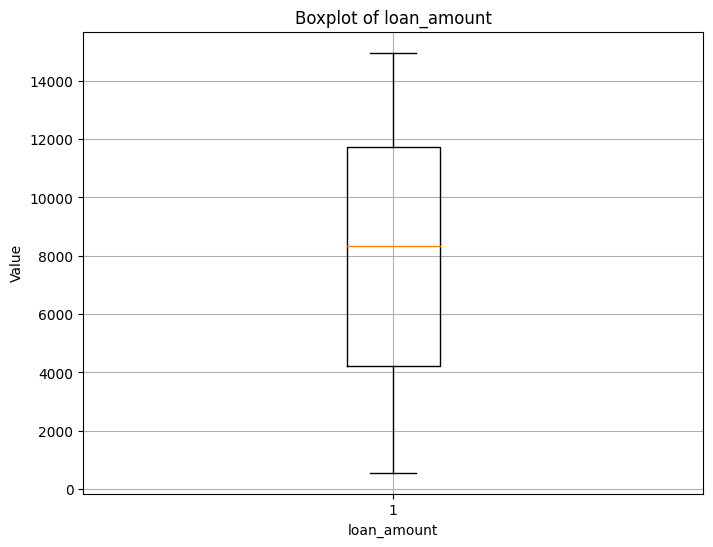

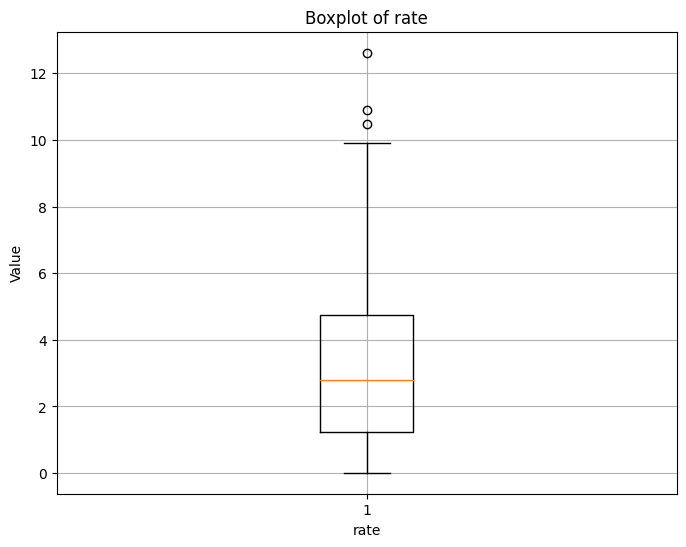

In [ ]:
#6. Check if there is a presence of outliers using Boxplot.

column_to_check = ['loan_amount', 'rate']

for col in column_to_check:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[col])
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.title('Boxplot of ' + col)
    plt.grid(True)
    plt.show()


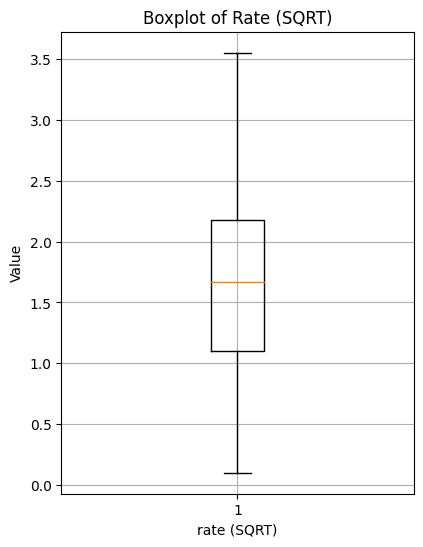

In [ ]:
#7. If there are a presence of outliers, do the following and explain the results:

	#a. Treat them using SQRT transformation

df_transformed_sqrt_rate = df.copy()

df_transformed_sqrt_rate["rate"] = np.sqrt(df_transformed_sqrt_rate["rate"])

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 2)
plt.boxplot(df_transformed_sqrt_rate["rate"])
plt.xlabel("rate (SQRT)")
plt.ylabel("Value")
plt.title("Boxplot of Rate (SQRT)")
plt.grid(True)

plt.show()


SQRT (or Square Root) transformation is applied to data to help normalize skewed distributions. Skewed distributions occur when data points are heavily concentrated on one side of the range with a long tail extending outward. This transformation compresses the larger values in the tail and spreads out the smaller values, making the distribution more symmetrical. This lessens the impact of extreme values or outliers, which can be helpful for certain statistical analyses and machine learning models. It's particularly useful for count data, where the values are naturally non-negative and often have a right-skewed distribution.

In [ ]:
# b. Treat them using the capping approach: Z-Score.

df["z_score_rate"] = (df["rate"] - df["rate"].mean()) / df["rate"].std()

df_capped = df.copy()

df_capped.loc[df["z_score_rate"].abs() > z_score_threshold, "rate"] = df["rate"].mean() + z_score_threshold * df["rate"].std()

plt.show()

The Z-score capping approach identifies outliers in numerical data by calculating their standard deviation (SD) from the mean. For outliers exceeding a specified threshold (commonly 3 SD), we replace their values with the values at the threshold distance from the mean. This "caps" the data within a certain range, reducing the influence of extreme values while preserving data integrity. While not perfect, it can be helpful when outliers significantly skew the distribution and impact model performance.

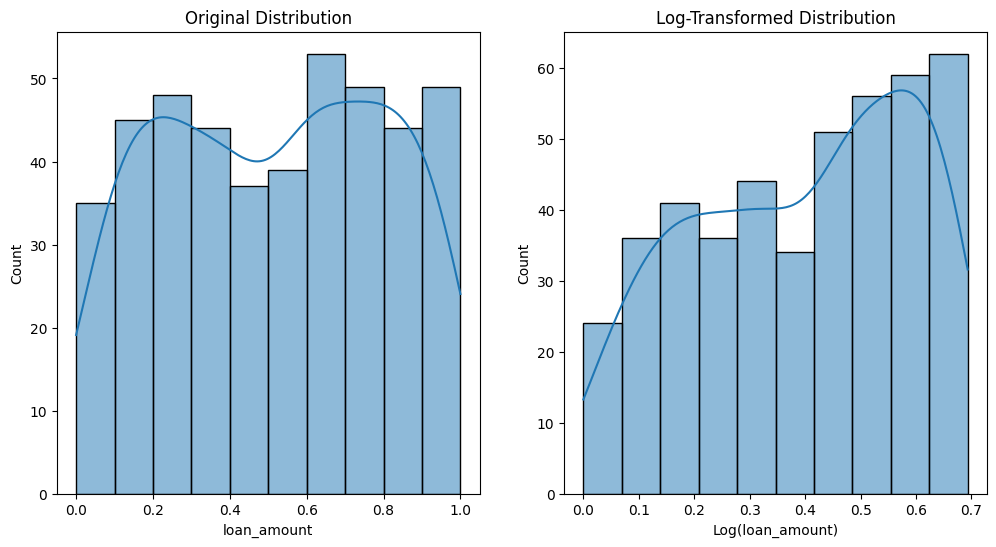

Original Skewness: -0.0400, Original Kurtosis: -1.2318
Transformed Skewness: -0.2689, Transformed Kurtosis: -1.1356


In [ ]:
#8. Upon checking the datatypes for each columns, for numerical variables, apply scaling using Min-Max Normalization.
#Display the skewness and kurtosis graphs for Loan Amount and explain the results.
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew, kurtosis


numeric_cols = df.select_dtypes(include=np.number).columns


scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.histplot(df['loan_amount'], kde=True)
plt.title('Original Distribution')
plt.xlabel('loan_amount')


plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['loan_amount']), kde=True)
plt.title('Log-Transformed Distribution')
plt.xlabel('Log(loan_amount)')

plt.show()

original_skewness = skew(df['loan_amount'])
original_kurtosis = kurtosis(df['loan_amount'])
transformed_skewness = skew(np.log1p(df['loan_amount']))
transformed_kurtosis = kurtosis(np.log1p(df['loan_amount']))

print(f"Original Skewness: {original_skewness:.4f}, Original Kurtosis: {original_kurtosis:.4f}")
print(f"Transformed Skewness: {transformed_skewness:.4f}, Transformed Kurtosis: {transformed_kurtosis:.4f}")

The graph on the left depicts the frequency  distribution of the "loan_amount" variable before any transformation. While the graph on the right shows the frequency distribution of the "loan_amount" variable after applying a log transformation. Original Distribution skewness value is very close to zero, that's why as we can see in graph, it is approximately symmetric distribution. Log-Transformed Distribution skewness value (-0.2689) is slightly negative, depicting it is a mildly left-skewed distribution as what we can see also in graph. The original distribution kurtosis value (-1.2318) is less than 3, signifying a distribution that is more flatter than a normal distribution. This means that the data has fewer extreme values (outliers). While the Log-Transformed Distribution kurtosis value (-1.1356) is still more closer to 3 than the original kurtosis value (-1.2318). It indicates that the transformation has not  significantly changed the overall kurtosis, and the data remains flatter than a normal distribution with fewer extreme values.

In [ ]:
#9. As for the categorical features, apply encoding of categorical variables into dummy variables using pd.get_dummies approach. Show the first five (5) rows.

categorical_cols = df.select_dtypes(include='object').columns

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df_encoded.head()

,loan_amount,repaid,loan_id,rate,z_score_rate,z_score_loan_amount,loan_tenure,loan_type_credit,loan_type_home,loan_type_other,...,loan_end_2016-11-14,loan_end_2016-11-27,loan_end_2016-12-10,loan_end_2016-12-29,loan_end_2017-01-16,loan_end_2017-01-19,loan_end_2017-01-26,loan_end_2017-01-29,loan_end_2017-02-15,loan_end_2017-05-07
client_id,,,,,,,,,,,,,,,,,,,,,
46109,0.909867,0.0,0.118063,0.169707,0.169707,0.909867,0.224900,0,1,0,...,0,0,0,0,0,0,0,0,0,0
46109,0.640785,0.0,0.491927,0.098335,0.098335,0.640785,0.269076,1,0,0,...,0,0,0,0,0,0,0,0,0,0
46109,0.844782,1.0,0.494955,0.053132,0.053132,0.844782,0.036145,0,1,0,...,0,0,0,0,0,0,0,0,0,0
46109,0.829795,1.0,0.296165,0.097542,0.097542,0.829795,0.759036,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46109,0.936026,1.0,0.709384,0.247423,0.247423,0.936026,0.367470,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#10. Create new derived features to calculate the tenure of the loan by using the loan_start and loan_end.

df['loan_start'] = pd.to_datetime(df['loan_start'])
df['loan_end'] = pd.to_datetime(df['loan_end'])

df['loan_tenure'] = (df['loan_end'] - df['loan_start']).dt.days

df[['loan_start', 'loan_end', 'loan_tenure']].head()

,loan_start,loan_end,loan_tenure
client_id,,,
46109,2002-04-16,2003-12-20,613
46109,2003-10-21,2005-07-17,635
46109,2006-02-01,2007-07-05,519
46109,2010-12-08,2013-05-05,879
46109,2010-07-07,2012-05-21,684


In [ ]:
#11. Split the data into training and test sets with 80-20 division.

from sklearn.model_selection import train_test_split

# Define the target column
target_column = 'repaid'

# Separate features (X) and target variable (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Split the data into training and test sets (80-20 division)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (354, 9) (354,)
Test set shape: (89, 9) (89,)
